In [1]:
import pandas as pd
from tqdm import tqdm
from tegame import *
import matplotlib.pyplot as plt
import numpy as np

In [4]:
results = []

# Threshold range
threshold_range = range(1,20)

# Number of simulations per combination
N_sim = 50  # adjust higher for more accuracy

for thresh_sec in tqdm(threshold_range, desc="thresh_secondchoice"):
    for thresh_non in threshold_range:
        wins = 0
        losses = 0
        for _ in range(N_sim):
            game = Tegame(
                players=2,
                verb_lvl=0,
                thresh_secondchoice=thresh_sec,
                thresh_nonmandatory=thresh_non
            )
            game.restart()
            game_won = game.run_game()  # must return "win" or "loss"
            if game_won:
                wins += 1
            else:
                losses += 1

        # Save aggregated statistics
        results.append({
            "thresh_secondchoice": thresh_sec,
            "thresh_nonmandatory": thresh_non,
            "wins": wins,
            "losses": losses,
            "win_rate": wins / N_sim
        })

# Convert to DataFrame
df_stats = pd.DataFrame(results)
print(df_stats)

thresh_secondchoice: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:44<00:00,  2.36s/it]

     thresh_secondchoice  thresh_nonmandatory  wins  losses  win_rate
0                      1                    1     2      48      0.04
1                      1                    2     3      47      0.06
2                      1                    3     3      47      0.06
3                      1                    4     1      49      0.02
4                      1                    5     2      48      0.04
..                   ...                  ...   ...     ...       ...
356                   19                   15     0      50      0.00
357                   19                   16     0      50      0.00
358                   19                   17     0      50      0.00
359                   19                   18     0      50      0.00
360                   19                   19     0      50      0.00

[361 rows x 5 columns]


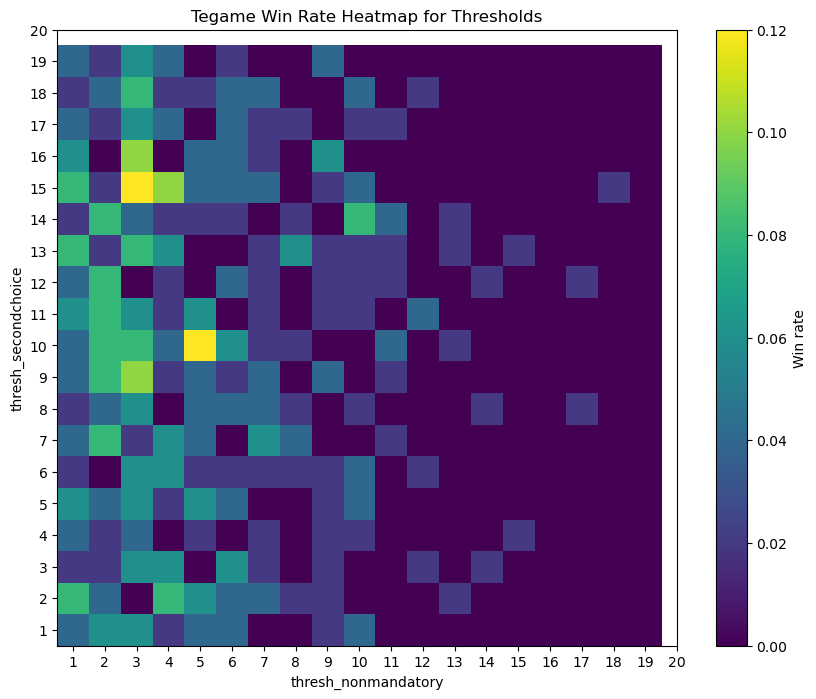

In [5]:
# Pivot data for heatmap
heatmap_data = df_stats.pivot(
    index='thresh_secondchoice',
    columns='thresh_nonmandatory',
    values='win_rate'
)

# Convert to numpy array
data = heatmap_data.to_numpy()

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(data, origin='lower', cmap='viridis', aspect='auto')

# Colorbar
cbar = plt.colorbar()
cbar.set_label('Win rate')

# Axes labels
plt.xticks(ticks=np.arange(20), labels=np.arange(1, 21))
plt.yticks(ticks=np.arange(20), labels=np.arange(1, 21))
plt.xlabel('thresh_nonmandatory')
plt.ylabel('thresh_secondchoice')
plt.title('Tegame Win Rate Heatmap for Thresholds')

plt.show()
